*De La Salle University – Dasmariñas*  
***COLLEGE OF INFORMATION AND COMPUTER STUDIES***  
*COMPUTER SCIENCE DEPARTMENT*

**Activity:** KNN Algorithm  
**Objectives:** To understand and implement KNN algorithm for classification  
**Dataset:**
- Download Iris dataset (UCI Machine Learning Repository)
- https://archive.ics.uci.edu/

### What to do:
- Data collection
- Data pre processing
- Data visualization
- Train Test split
- Implement KNN Algorithm
- Prediction
- Model evaluation
- Experiment with k values. K= 5, 10, 15, 20, 25
- Interpretation, observation, results and discussion

Submit a copy file in .ipynb format and pdf file

## Data Collection: Importing the Iris dataset

In [2]:
from sklearn import datasets
import pandas as pd

# Load iris dataset
iris = datasets.load_iris()

# Since this is a bunch, create a dataframe
iris_df = pd.DataFrame(iris.data)
iris_df['class'] = iris.target

iris_df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # Remove any empty lines

## Data Preprocessing: Defining the dependent variable

In [3]:
# Selecting only the first four columns as the independent (X) variable.
# Any kind of feature selection or correlation analysis should be first done on these.
iris_X = iris_df.iloc[:,[0,1,2,3]]
iris_Y = iris_df.iloc[:,4]

## Data Visualization: Presenting the Iris dataset

### Presenting the data set as a table

In [4]:
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Presenting the data set as a pie chart

The final column in the earlier table, **class**, is numbered from 0 to 2, representing categorical data as follows.

- 0: Setosa
- 1: Versicolor
- 2: Virginica

We have converted these numbers into their respective species labels.

In [5]:
import matplotlib.pyplot as plt

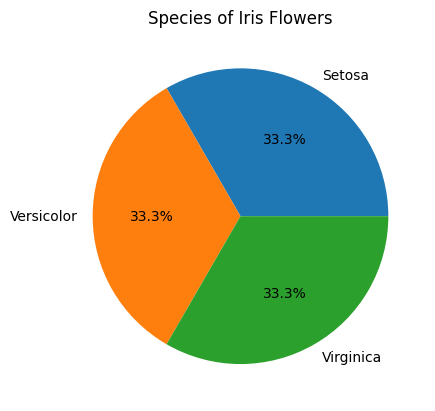

In [6]:
# Count the occurrences of each class (species)
class_counts = iris_df["class"].value_counts()

# Plot the pie chart using the counts
plt.pie(class_counts, labels=['Setosa', 'Versicolor', 'Virginica'], autopct='%1.1f%%')
plt.title("Species of Iris Flowers")
plt.show()

## Train, Test, Split

Making use of the `model_selection` class in the SciKit-Learn package, we separate our two sets of variables into a training set and a testing set.

We chose 25% as the size of the test set.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_X, iris_Y, test_size = 0.25, random_state = 0)

### Train, Test, Split: Peeking through the subsets of data

In [8]:
print(X_train)

     sepal_len  sepal_wid  petal_len  petal_wid
61         5.9        3.0        4.2        1.5
92         5.8        2.6        4.0        1.2
112        6.8        3.0        5.5        2.1
2          4.7        3.2        1.3        0.2
141        6.9        3.1        5.1        2.3
..         ...        ...        ...        ...
9          4.9        3.1        1.5        0.1
103        6.3        2.9        5.6        1.8
67         5.8        2.7        4.1        1.0
117        7.7        3.8        6.7        2.2
47         4.6        3.2        1.4        0.2

[112 rows x 4 columns]


In [9]:
print(Y_train)

61     1
92     1
112    2
2      0
141    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: class, Length: 112, dtype: int64


In [10]:
print(X_test)

     sepal_len  sepal_wid  petal_len  petal_wid
114        5.8        2.8        5.1        2.4
62         6.0        2.2        4.0        1.0
33         5.5        4.2        1.4        0.2
107        7.3        2.9        6.3        1.8
7          5.0        3.4        1.5        0.2
100        6.3        3.3        6.0        2.5
40         5.0        3.5        1.3        0.3
86         6.7        3.1        4.7        1.5
76         6.8        2.8        4.8        1.4
71         6.1        2.8        4.0        1.3
134        6.1        2.6        5.6        1.4
51         6.4        3.2        4.5        1.5
73         6.1        2.8        4.7        1.2
54         6.5        2.8        4.6        1.5
63         6.1        2.9        4.7        1.4
37         4.9        3.6        1.4        0.1
78         6.0        2.9        4.5        1.5
90         5.5        2.6        4.4        1.2
45         4.8        3.0        1.4        0.3
16         5.4        3.9        1.3    

In [11]:
print(Y_test)

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
137    2
84     1
27     0
127    2
132    2
59     1
18     0
83     1
Name: class, dtype: int64


As you may have observed, we have randomized and split the classic Iris flower data set into four variables — an X and a Y for the training set, and an X and a Y for the testing set.

## Implement KNN Algorithm

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
print(X_train)

[[ 1.54399532e-02 -1.19254753e-01  2.25126850e-01  3.55797625e-01]
 [-9.98450310e-02 -1.04039491e+00  1.13559562e-01 -2.98410911e-02]
 [ 1.05300481e+00 -1.19254753e-01  9.50314227e-01  1.12707506e+00]
 [-1.36797986e+00  3.41315328e-01 -1.39259884e+00 -1.31530348e+00]
 [ 1.16828980e+00  1.11030287e-01  7.27179649e-01  1.38416753e+00]
 [-1.02212490e+00  1.03217045e+00 -1.22524790e+00 -8.01118523e-01]
 [-5.60984968e-01  1.49274053e+00 -1.28103155e+00 -1.31530348e+00]
 [-1.02212490e+00 -2.42210516e+00 -1.65358660e-01 -2.86933568e-01]
 [ 7.07149859e-01 -1.19254753e-01  9.50314227e-01  7.41436341e-01]
 [ 9.37719827e-01  5.71600368e-01  1.06188152e+00  1.64126001e+00]
 [ 1.30724937e-01 -1.96153508e+00  6.71396005e-01  3.55797625e-01]
 [ 9.37719827e-01 -1.27067995e+00  1.11766516e+00  7.41436341e-01]
 [-3.30414999e-01 -1.27067995e+00  5.77759173e-02 -1.58387330e-01]
 [ 2.09056967e+00 -1.19254753e-01  1.28501609e+00  1.38416753e+00]
 [ 4.76579890e-01  5.71600368e-01  5.04045072e-01  4.84343863e

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
K = 5

In [16]:
classifier = KNeighborsClassifier(n_neighbors = K)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

## Prediction

In [17]:
import numpy as np

In [20]:
# Predicting the data set
Y_pred = classifier.predict(X_test)

comparison_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(comparison_df)

     Actual  Predicted
114       2          2
62        1          1
33        0          0
107       2          2
7         0          0
100       2          2
40        0          0
86        1          1
76        1          1
71        1          1
134       2          2
51        1          1
73        1          1
54        1          1
63        1          1
37        0          0
78        1          1
90        1          1
45        0          0
16        0          0
121       2          2
66        1          1
24        0          0
8         0          0
126       2          2
22        0          0
44        0          0
97        1          1
93        1          1
26        0          0
137       2          2
84        1          1
27        0          0
127       2          2
132       2          2
59        1          1
18        0          0
83        1          2


## Model Evaluation

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("")
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("Precision: ", precision_score(Y_test, Y_pred, average = 'micro'))
print("Recall: ", recall_score(Y_test, Y_pred, average = 'micro'))
print("F-1: ", f1_score(Y_test, Y_pred, average = 'micro'))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

Accuracy:  0.9736842105263158
Precision:  0.9736842105263158
Recall:  0.9736842105263158
F-1:  0.9736842105263158


## Experiment With K Values: `K = 5, 10, 15, 20, 25`

In [24]:
other_K = [5, 10, 15, 20, 25]

for k in other_K:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, Y_train)
  Y_pred = classifier.predict(X_test)
  print("K = ", k)
  print("Accuracy: ", accuracy_score(Y_test, Y_pred))
  print("Precision: ", precision_score(Y_test, Y_pred, average = 'micro'))
  print("Recall: ", recall_score(Y_test, Y_pred, average = 'micro'))
  print("F-1: ", f1_score(Y_test, Y_pred, average = 'micro'))
  print("")

K =  5
Accuracy:  0.9736842105263158
Precision:  0.9736842105263158
Recall:  0.9736842105263158
F-1:  0.9736842105263158

K =  10
Accuracy:  0.9736842105263158
Precision:  0.9736842105263158
Recall:  0.9736842105263158
F-1:  0.9736842105263158

K =  15
Accuracy:  0.9736842105263158
Precision:  0.9736842105263158
Recall:  0.9736842105263158
F-1:  0.9736842105263158

K =  20
Accuracy:  0.9473684210526315
Precision:  0.9473684210526315
Recall:  0.9473684210526315
F-1:  0.9473684210526315

K =  25
Accuracy:  0.9210526315789473
Precision:  0.9210526315789473
Recall:  0.9210526315789473
F-1:  0.9210526315789473



## Interpretation, Observation, Results and Discussion

### The Source Data Set
The Iris flower data set was used by “the father of modern statistical science,” Ronald Fisher from London, England, to discuss *the use of multiple measurements in taxonomic problems*.

It contains different observations of three different species of the Iris flower, which grows in temperate regions in Europe, Asia and North America.

The data set is often used in discussion and education of machine learning as a concept, which is why popular Python package SciKit Learn includes it in its list of sample datasets. (Notice that I was able to simply gather the dataset by importing the `datasets` class from `scikit-learn`.)

### Observing the K Values

**K** is a value to determine the classification of an object, based on which objects have the most in common with them.

Let's take a look at how these different K values fared.

#### Observing the K Values as a Line Chart

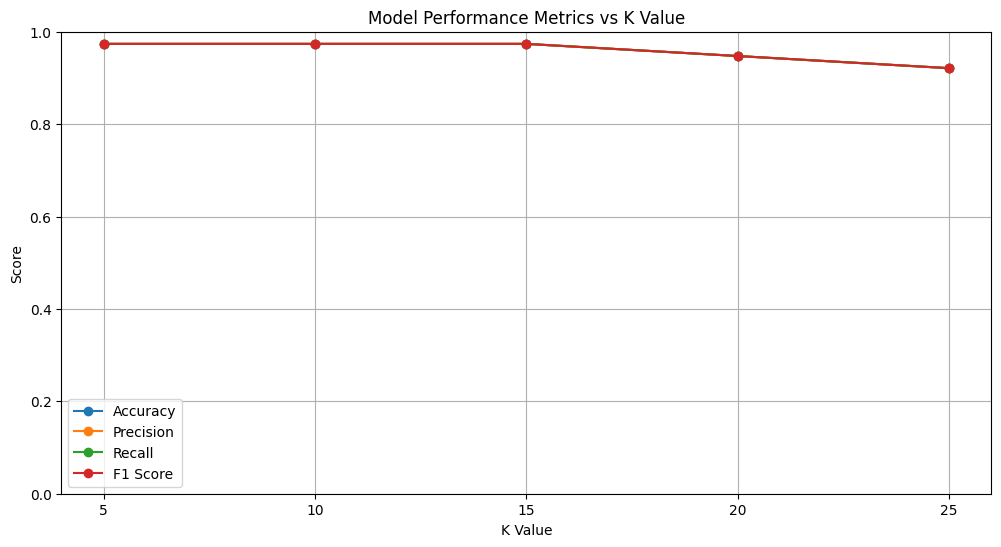

In [25]:
k_values = [5, 10, 15, 20, 25]
accuracies = [0.9737, 0.9737, 0.9737, 0.9474, 0.9211]
precisions = [0.9737, 0.9737, 0.9737, 0.9474, 0.9211]
recalls = [0.9737, 0.9737, 0.9737, 0.9474, 0.9211]
f1_scores = [0.9737, 0.9737, 0.9737, 0.9474, 0.9211]

plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.plot(k_values, precisions, marker='o', label='Precision')
plt.plot(k_values, recalls, marker='o', label='Recall')
plt.plot(k_values, f1_scores, marker='o', label='F1 Score')
plt.title('Model Performance Metrics vs K Value')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.xticks(k_values)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()

#### Observing the K Values as a Heatmap

In [27]:
import seaborn as sns

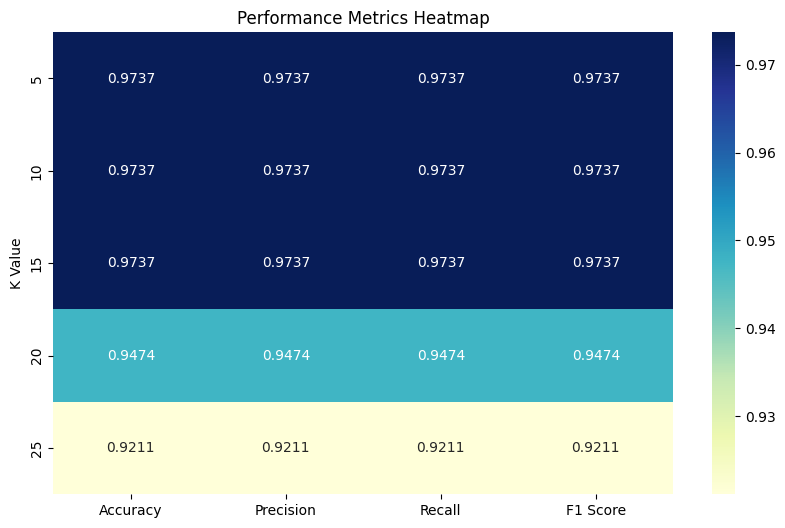

In [28]:
data = {
    'K': k_values,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index('K'), annot=True, cmap='YlGnBu', fmt=".4f")
plt.title('Performance Metrics Heatmap')
plt.ylabel('K Value')
plt.show()

#### The K Values and their Results in a Table

In [29]:
print(df)

    K  Accuracy  Precision  Recall  F1 Score
0   5    0.9737     0.9737  0.9737    0.9737
1  10    0.9737     0.9737  0.9737    0.9737
2  15    0.9737     0.9737  0.9737    0.9737
3  20    0.9474     0.9474  0.9474    0.9474
4  25    0.9211     0.9211  0.9211    0.9211


### Results and Discussion

I noticed that the higher the *k*-value from the default of 5, the worse the metrics came to be. The first three *k* values suggested by our instructor, College of Information and Computer Studies (CICS) Associate Dean Rolando B. Barrameda, led to identical results, but a *k* value somewhere between `15` and `20` started the downfall in accuracy score.

I believe this is because of the limitations of underfitting the data, such that it is overemphasizing objects that end up as not actually similar enough to each species being analyzed.

The Iris data set is too small for higher *k* values. It has 150 instances of flowers, and that was split based on a ratio of 75% to 25%. A prediction based on 15 nearest neighbors is one that already encompasses more than 13% of the training set.

Ultimately, for smaller datasets like these, the default setting worked the best.